In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
tf.random.set_seed(1234)
import os
import random

In [3]:
os.environ['PYTHONHASHSEED']=str(1234)
tf.random.set_seed(1234)
np.random.seed(1234)
random.seed(1234)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from mlxtend.plotting import plot_decision_regions
%matplotlib inline


In [5]:
PCA_df = pd.read_csv("pca_3.csv",index_col=[0])
PCA_df

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.485152,-0.268583,-0.507123,0.513626,-0.233606,0.030368,0.058925,-0.343838,0.243563,0.286981,...,-0.099946,0.081991,0.090898,-0.017447,0.121411,-0.015282,0.080368,-0.118612,-0.045980,-0.011813
1,-0.145042,-0.353461,-0.183404,-0.139457,-0.245284,-0.129782,0.252421,-0.349743,0.220273,0.805366,...,0.155708,-0.099277,0.057628,0.085873,-0.022387,-0.130570,0.083693,0.089900,0.141666,0.119717
2,-0.173621,-0.210423,-0.200054,-0.314970,0.105571,-0.199907,-0.110117,0.278727,-0.162158,0.274271,...,0.159069,-0.130396,-0.007525,0.038919,-0.133981,0.069500,0.077070,0.069247,-0.060637,-0.157007
3,0.396161,-0.094074,-0.584406,0.188463,0.424859,0.632022,-0.447740,-0.320468,0.039108,-0.089374,...,0.037839,-0.076964,0.109443,-0.010140,0.230267,0.041187,-0.201982,0.065821,-0.019499,-0.062648
4,-0.427098,-0.211032,0.043938,0.211464,-0.214811,-0.171968,-0.411327,-0.091980,0.044690,-0.117016,...,-0.249445,0.027913,-0.207839,0.081620,0.099522,-0.040893,0.002526,0.224720,0.039183,-0.006331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,0.657660,0.729199,-0.639379,0.014235,0.133790,-0.012341,0.578221,-0.173464,-0.132391,-0.040307,...,0.125742,0.031025,-0.127581,-0.092240,-0.084597,-0.005976,0.010087,0.086644,-0.047780,0.064984
1999,-0.326346,-0.283518,-0.013171,0.085992,0.112580,0.142915,0.355098,-0.170318,-0.290209,-0.250151,...,0.018072,-0.073200,-0.107384,0.037324,0.023242,0.009963,0.170823,0.098070,0.042203,-0.056280
2000,-0.211847,-0.293808,-0.109366,-0.112704,0.082216,-0.011944,0.378527,0.025612,-0.203169,0.315890,...,-0.081705,-0.005122,0.074399,-0.203843,-0.166209,-0.082116,-0.042335,0.021290,0.068202,-0.022748
2001,-0.334557,-0.315646,-0.028062,0.103931,-0.044717,0.070572,0.359556,-0.061466,-0.081412,0.241167,...,0.024980,0.011861,-0.003077,0.053481,0.203389,0.241135,-0.139370,-0.015324,-0.123194,-0.093305


In [6]:
df = pd.read_csv("drug_onehot_latest.csv")
df

,inpatient.number,Atorvastatin calcium tablet,Benazepril hydrochloride tablet,Deslanoside injection,Digoxin tablet,Dobutamine hydrochloride injection,Furosemide injection,Furosemide tablet,Hydrochlorothiazide tablet,Isoprenaline Hydrochloride injection,Isosorbide Mononitrate Sustained Release tablet,Meglumine Adenosine Cyclophosphate for injection,Milrinone injection,Nitroglycerin injection,Shenfu injection,Spironolactone tablet,Torasemide tablet,Valsartan Dispersible tablet,sulfotanshinone sodium injection
0,722128,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0
1,723327,1,0,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,0
2,723617,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,724385,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0
4,725509,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,870258,0,0,0,0,1,1,1,0,0,0,0,1,1,0,1,0,1,0
1999,870646,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0
2000,879601,1,1,1,1,0,1,1,0,0,0,1,1,1,0,1,0,0,0
2001,905163,0,1,1,1,0,1,0,0,0,0,1,1,0,1,1,1,0,0


In [7]:
df.drop(['inpatient.number'], axis=1,inplace=True)

In [8]:
q = 'Atorvastatin calcium tablet'

In [9]:
print("Running for :",q)
trainer = pd.concat([PCA_df, df[q]], axis = 1)

Running for : Atorvastatin calcium tablet


In [10]:
trainer

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,Atorvastatin calcium tablet
0,0.485152,-0.268583,-0.507123,0.513626,-0.233606,0.030368,0.058925,-0.343838,0.243563,0.286981,...,0.081991,0.090898,-0.017447,0.121411,-0.015282,0.080368,-0.118612,-0.045980,-0.011813,0
1,-0.145042,-0.353461,-0.183404,-0.139457,-0.245284,-0.129782,0.252421,-0.349743,0.220273,0.805366,...,-0.099277,0.057628,0.085873,-0.022387,-0.130570,0.083693,0.089900,0.141666,0.119717,1
2,-0.173621,-0.210423,-0.200054,-0.314970,0.105571,-0.199907,-0.110117,0.278727,-0.162158,0.274271,...,-0.130396,-0.007525,0.038919,-0.133981,0.069500,0.077070,0.069247,-0.060637,-0.157007,1
3,0.396161,-0.094074,-0.584406,0.188463,0.424859,0.632022,-0.447740,-0.320468,0.039108,-0.089374,...,-0.076964,0.109443,-0.010140,0.230267,0.041187,-0.201982,0.065821,-0.019499,-0.062648,0
4,-0.427098,-0.211032,0.043938,0.211464,-0.214811,-0.171968,-0.411327,-0.091980,0.044690,-0.117016,...,0.027913,-0.207839,0.081620,0.099522,-0.040893,0.002526,0.224720,0.039183,-0.006331,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,0.657660,0.729199,-0.639379,0.014235,0.133790,-0.012341,0.578221,-0.173464,-0.132391,-0.040307,...,0.031025,-0.127581,-0.092240,-0.084597,-0.005976,0.010087,0.086644,-0.047780,0.064984,0
1999,-0.326346,-0.283518,-0.013171,0.085992,0.112580,0.142915,0.355098,-0.170318,-0.290209,-0.250151,...,-0.073200,-0.107384,0.037324,0.023242,0.009963,0.170823,0.098070,0.042203,-0.056280,0
2000,-0.211847,-0.293808,-0.109366,-0.112704,0.082216,-0.011944,0.378527,0.025612,-0.203169,0.315890,...,-0.005122,0.074399,-0.203843,-0.166209,-0.082116,-0.042335,0.021290,0.068202,-0.022748,1
2001,-0.334557,-0.315646,-0.028062,0.103931,-0.044717,0.070572,0.359556,-0.061466,-0.081412,0.241167,...,0.011861,-0.003077,0.053481,0.203389,0.241135,-0.139370,-0.015324,-0.123194,-0.093305,0


In [11]:
count_class_0, count_class_1 = trainer[q].value_counts()[0], trainer[q].value_counts()[1]

# Divide by class
df_class_0 = trainer[trainer[q] == 0]
df_class_1 = trainer[trainer[q] == 1]
if count_class_0>count_class_1:
    df_class_1_over = df_class_1.sample(count_class_0, replace=True)
    df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
else:
    df_class_0_over = df_class_0.sample(count_class_1,replace=True)
    df_test_over = pd.concat([df_class_0_over, df_class_1], axis=0)

print('Random over-sampling:')
print(df_test_over[q].value_counts())
X = df_test_over.drop(q,axis='columns')
y = df_test_over[q]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)
loss = keras.losses.BinaryCrossentropy()
weights = -1


Random over-sampling:
0    1185
1    1185
Name: Atorvastatin calcium tablet, dtype: int64


In [12]:
# from keras.callbacks import History 
# history = History()

In [13]:
# from keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=4, mode='auto')

In [17]:
model = keras.Sequential([
    keras.layers.Dense(128, input_dim=46, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss=loss, metrics=['accuracy'])

if weights == -1:
    his = model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=50,verbose = 0)
else:
    his = model.fit(X_train, y_train, epochs=50, class_weight = weights)

model.evaluate(X_test, y_test,verbose = 0)

y_preds = model.predict(X_test)
y_preds = np.round(y_preds)

print("Classification Report: \n", classification_report(y_test, y_preds))

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.65      0.72       237
           1       0.70      0.84      0.76       237

    accuracy                           0.74       474
   macro avg       0.75      0.74      0.74       474
weighted avg       0.75      0.74      0.74       474



In [20]:
reg_model = Sequential()
reg_model.add(Dense(128, input_dim=46, activation='relu',  kernel_regularizer='l2'))
reg_model.add(Dropout(0.2))
reg_model.add(Dense(64, activation='relu',  kernel_regularizer='l2'))
reg_model.add(Dense(32, activation='relu',  kernel_regularizer='l2'))
# reg_model.add(Dropout(0.2))
reg_model.add(Dense(1, activation='sigmoid', kernel_regularizer='l2'))
reg_model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])


history = reg_model.fit(X_train, y_train, 
                            validation_data=(X_test, y_test), 
                            epochs=100, verbose=1)

print(reg_model.evaluate(X_test, y_test))

y_preds = reg_model.predict(X_test)
y_preds = np.round(y_preds)

print("Classification Report: \n", classification_report(y_test, y_preds))

Epoch 1/100
60/60 [==============================] - 1s 5ms/step - loss: 2.0021 - accuracy: 0.5248 - val_loss: 1.4572 - val_accuracy: 0.6055
Epoch 2/100
60/60 [==============================] - 0s 2ms/step - loss: 1.1767 - accuracy: 0.5675 - val_loss: 0.9604 - val_accuracy: 0.6118
Epoch 3/100
60/60 [==============================] - 0s 2ms/step - loss: 0.8578 - accuracy: 0.5554 - val_loss: 0.7812 - val_accuracy: 0.5717
Epoch 4/100
60/60 [==============================] - 0s 2ms/step - loss: 0.7468 - accuracy: 0.5585 - val_loss: 0.7216 - val_accuracy: 0.5000
Epoch 5/100
60/60 [==============================] - 0s 2ms/step - loss: 0.7106 - accuracy: 0.5058 - val_loss: 0.7025 - val_accuracy: 0.5000
Epoch 6/100
60/60 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.5000 - val_loss: 0.6965 - val_accuracy: 0.5000
Epoch 7/100
60/60 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.4794 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 8/100
6

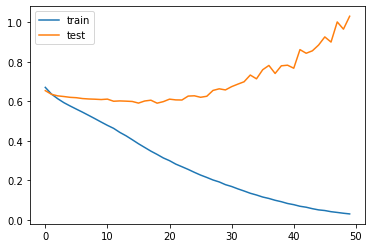

In [22]:
plt.plot(his.history['loss'], label='train')
plt.plot(his.history['val_loss'], label='test')
plt.legend()
plt.show()